【線性模型】
權重 w: 0.7179, 截距 b: -157.5200
MSE = 949888.28
R²  = 0.649

【多項式模型 (degree=6)】
MSE = 356084.54
R²  = 0.868


c:\Users\jack\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


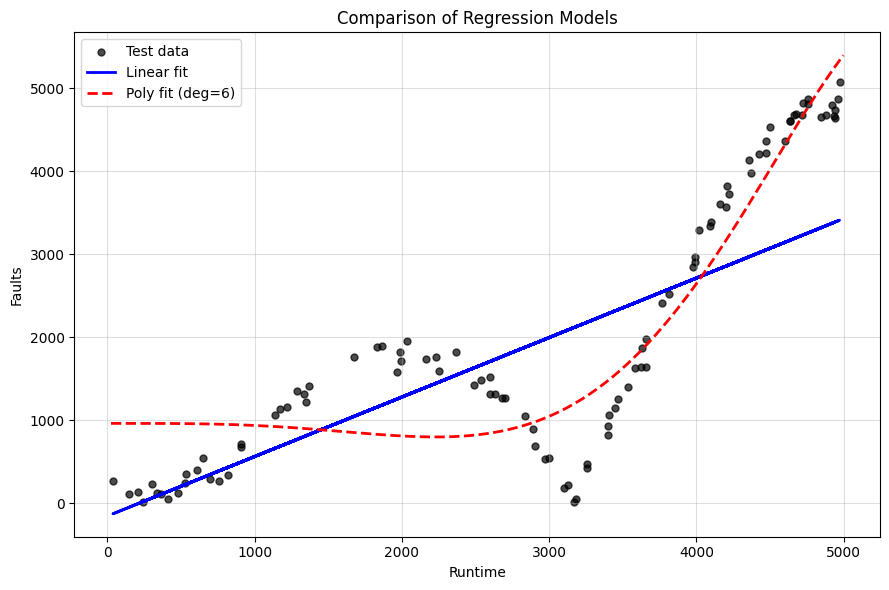

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# === 資料讀取 ===
df = pd.read_csv(r"C:\Users\jack\Downloads\new\dataset.csv")
feature = df[['Runtime']]      # 自變數
target = df['faults']          # 應變數

# === 資料分割 ===
X_tr, X_te, y_tr, y_te = train_test_split(feature, target, 
                                          test_size=0.2, 
                                          random_state=42)

# === 線性模型 ===
lin_reg = LinearRegression()
lin_reg.fit(X_tr, y_tr)
pred_lin = lin_reg.predict(X_te)

print("【線性模型】")
print(f"權重 w: {lin_reg.coef_[0]:.4f}, 截距 b: {lin_reg.intercept_:.4f}")
print(f"MSE = {mean_squared_error(y_te, pred_lin):.2f}")
print(f"R²  = {r2_score(y_te, pred_lin):.3f}\n")

# === 多項式模型 ===
deg = 6
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=deg)),
    ('reg', LinearRegression())
])
poly_model.fit(X_tr, y_tr)
pred_poly = poly_model.predict(X_te)

print(f"【多項式模型 (degree={deg})】")
print(f"MSE = {mean_squared_error(y_te, pred_poly):.2f}")
print(f"R²  = {r2_score(y_te, pred_poly):.3f}")

# === 視覺化 ===
plt.figure(figsize=(9, 6))
plt.scatter(X_te, y_te, c='k', s=25, alpha=0.7, label="Test data")

# 線性曲線
plt.plot(X_te, pred_lin, 'b-', lw=2, label="Linear fit")

# 多項式曲線（平滑）
X_curve = np.linspace(feature.min(), feature.max(), 200).reshape(-1, 1)
plt.plot(X_curve, poly_model.predict(X_curve), 'r--', lw=2, label=f"Poly fit (deg={deg})")

plt.xlabel("Runtime")
plt.ylabel("Faults")
plt.title("Comparison of Regression Models")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()